In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import alpaca_trade_api as tradeapi

# Makes output higher resolution.
%config InlineBackend.figure_format = 'retina'

In [7]:
# Paper trade log-in
API_KEY = 'PKBDKFU5C6H1NDDPOYMQ'
API_SECRET='7zCK3NlyMr5Vk0walxFk9cy3QtOJ6OpvpShR0wDP'
api = tradeapi.REST(API_KEY, API_SECRET, base_url='https://paper-api.alpaca.markets')

In [23]:
import yfinance as yf
msft = yf.Ticker("MSFT")
# Get the data for the stock AAPL
#data = msft.history(period="max")

msft.re

,0,1
0,0.08%,% of Shares Held by All Insider
1,71.76%,% of Shares Held by Institutions
2,71.82%,% of Float Held by Institutions
3,5306,Number of Institutions Holding Shares


In [25]:
msft.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
...,...,...,...,...
2021-09-14 12:12:00,Morgan Stanley,Overweight,,main
2021-09-17 13:09:25,Barclays,Overweight,,main
2021-10-20 14:25:33,Jefferies,Buy,,main


In [8]:

def get_bars(symbol):
    
    data = api.get_barset(symbol, 'day', limit=1000)
    data = data.df[symbol]['close']

    return data

In [9]:

def correlation(equity_list):  
    
    df = pd.DataFrame()
    equity_columns = []
    
    # Get symbol history
    for symbol in equity_list:   
        try:
            symbol_df = get_bars(symbol)
            df = pd.concat([df, symbol_df], axis=1)
            equity_columns.append(symbol)
        except:
            print('Exception with {}'.format(symbol))
            
    df.columns = equity_columns
    
    # Get correlation and sort by sum
    sum_corr = df.corr().sum().sort_values(ascending=True).index.values
    
    return df[sum_corr].corr()

In [10]:
pos_list = [x.symbol for x in api.list_positions()]


In [ ]:
account_balance = float(initial_balance) / self.stock_dim
balances = np.array([account_balance] * self.stock_dim)
first_prices = np.array(self.df.loc[0, 'adjcp'].replace(0,1).values.tolist())
# TODO: check if self.day is called on the right day in step process
dates_prices = np.array(self.df.loc[self.day,'adjcp'].replace(0,1).values.tolist()) # todays price
pct_changes = (dates_prices - first_prices) / first_prices
portfolio_value = sum(balances + (balances * pct_changes))

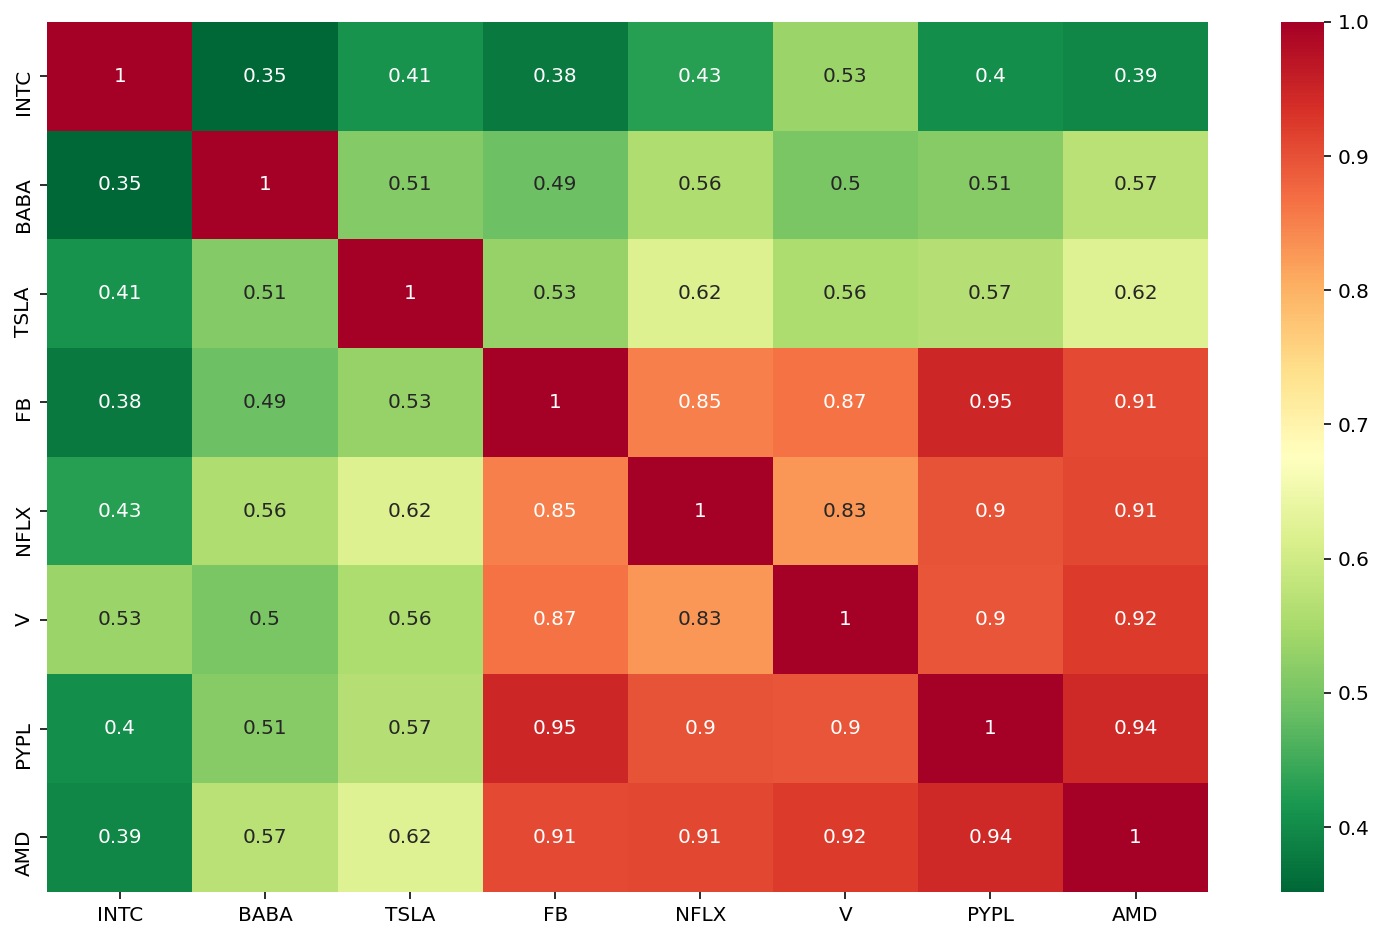

In [11]:
# Call the df with the list from summed correlation, sorted ascending.
plt.figure(figsize=(13,8))
sns.heatmap(correlation(pos_list), 
            annot=True, 
            cmap="RdYlGn_r");

In [12]:
# Bonus code: compare sorting by "absolute" correlation coef sums.

def abs_correlation(equity_list):  
    
    df = pd.DataFrame()
    equity_columns = []
    
    # Get symbol history
    for symbol in equity_list:   
        try:
            symbol_df = get_bars(symbol)
            df = pd.concat([df, symbol_df], axis=1)
            equity_columns.append(symbol)
        except:
            print('Exception with {}'.format(symbol))
            
    df.columns = equity_columns
    
    # Get correlation and sort by sum
    sum_corr = abs(df.corr()).sum().sort_values(ascending=True).index.values
    
    return df[sum_corr].corr()

In [13]:
my_list = ['INTC',
'MSFT',
'NFLX',
'NVDA',
'PYPL',
'TSLA',
'V',
'AAPL',
'ADBE',
'AMD',
'AMZN',
'BA',
'BABA',
'CRM',
'CSCO',
'DIS',
'FB',
'GOOGL']
pos_list = ['SNAP', 'SLV', 'JNJ', 'GOOG', 
            'GLD', 'EWZ', 'CAT', 'AAPL', 
            'USO', 'AAL', 'QQQ', 'AMZN', 
            'MMM', 'JNK', 'TLT', 'GS']

In [14]:
cor_table = abs_correlation(my_list)

In [15]:
cor_table

,AAPL,CSCO,INTC,BABA,TSLA,BA,NVDA,DIS,GOOGL,NFLX,V,FB,CRM,AMD,AMZN,ADBE,PYPL,MSFT
AAPL,1.000000,-0.098101,0.225577,0.019935,0.503272,-0.066189,-0.201153,-0.339195,-0.302618,-0.168228,-0.044508,-0.255951,-0.228395,-0.158067,-0.160881,-0.160537,-0.286967,-0.137041
CSCO,-0.098101,1.000000,0.249655,-0.284543,0.033439,0.228283,-0.055053,0.573523,0.489383,0.358338,0.474750,0.392772,0.353566,0.307509,0.311712,0.392139,0.401992,0.404851
INTC,0.225577,0.249655,1.000000,0.351895,0.411940,-0.264263,0.357190,0.425713,0.405248,0.428473,0.534922,0.376219,0.369719,0.393805,0.389864,0.414709,0.404787,0.475226
BABA,0.019935,-0.284543,0.351895,1.000000,0.513283,-0.628992,0.766663,0.297292,0.303007,0.557859,0.503058,0.490823,0.575870,0.571954,0.631084,0.516806,0.514845,0.493914
TSLA,0.503272,0.033439,0.411940,0.513283,1.000000,-0.668355,0.483631,0.318420,0.481091,0.618381,0.556085,0.530539,0.528198,0.621146,0.648065,0.608991,0.567038,0.621200
BA,-0.066189,0.228283,-0.264263,-0.628992,-0.668355,1.000000,-0.606937,-0.286154,-0.509706,-0.647514,-0.560796,-0.592788,-0.610603,-0.714397,-0.714610,-0.674576,-0.631473,-0.680427
NVDA,-0.201153,-0.055053,0.357190,0.766663,0.483631,-0.606937,1.000000,0.534536,0.550487,0.668540,0.617990,0.653280,0.656269,0.661692,0.767032,0.644514,0.722969,0.640272
DIS,-0.339195,0.573523,0.425713,0.297292,0.318420,-0.286154,0.534536,1.000000,0.848555,0.692417,0.846797,0.808729,0.762213,0.792746,0.751982,0.786119,0.863450,0.824167
GOOGL,-0.302618,0.489383,0.405248,0.303007,0.481091,-0.509706,0.550487,0.848555,1.000000,0.830310,0.847595,0.951818,0.865885,0.888014,0.860656,0.926636,0.937345,0.938174
NFLX,-0.168228,0.358338,0.428473,0.557859,0.618381,-0.647514,0.668540,0.692417,0.830310,1.000000,0.828289,0.851561,0.922951,0.910019,0.948340,0.922427,0.897880,0.902828


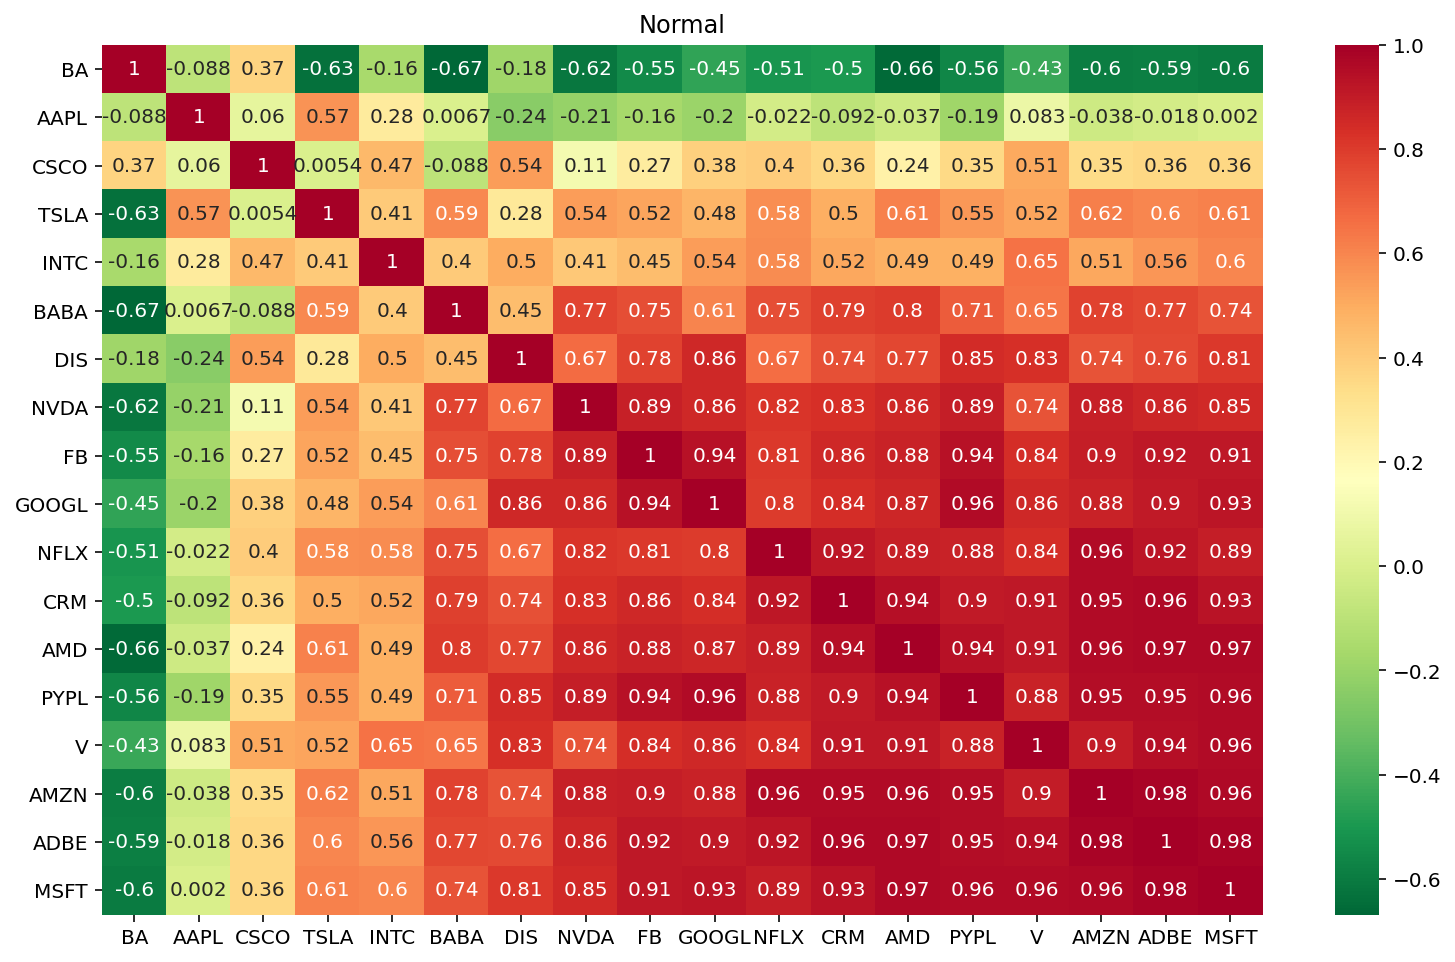

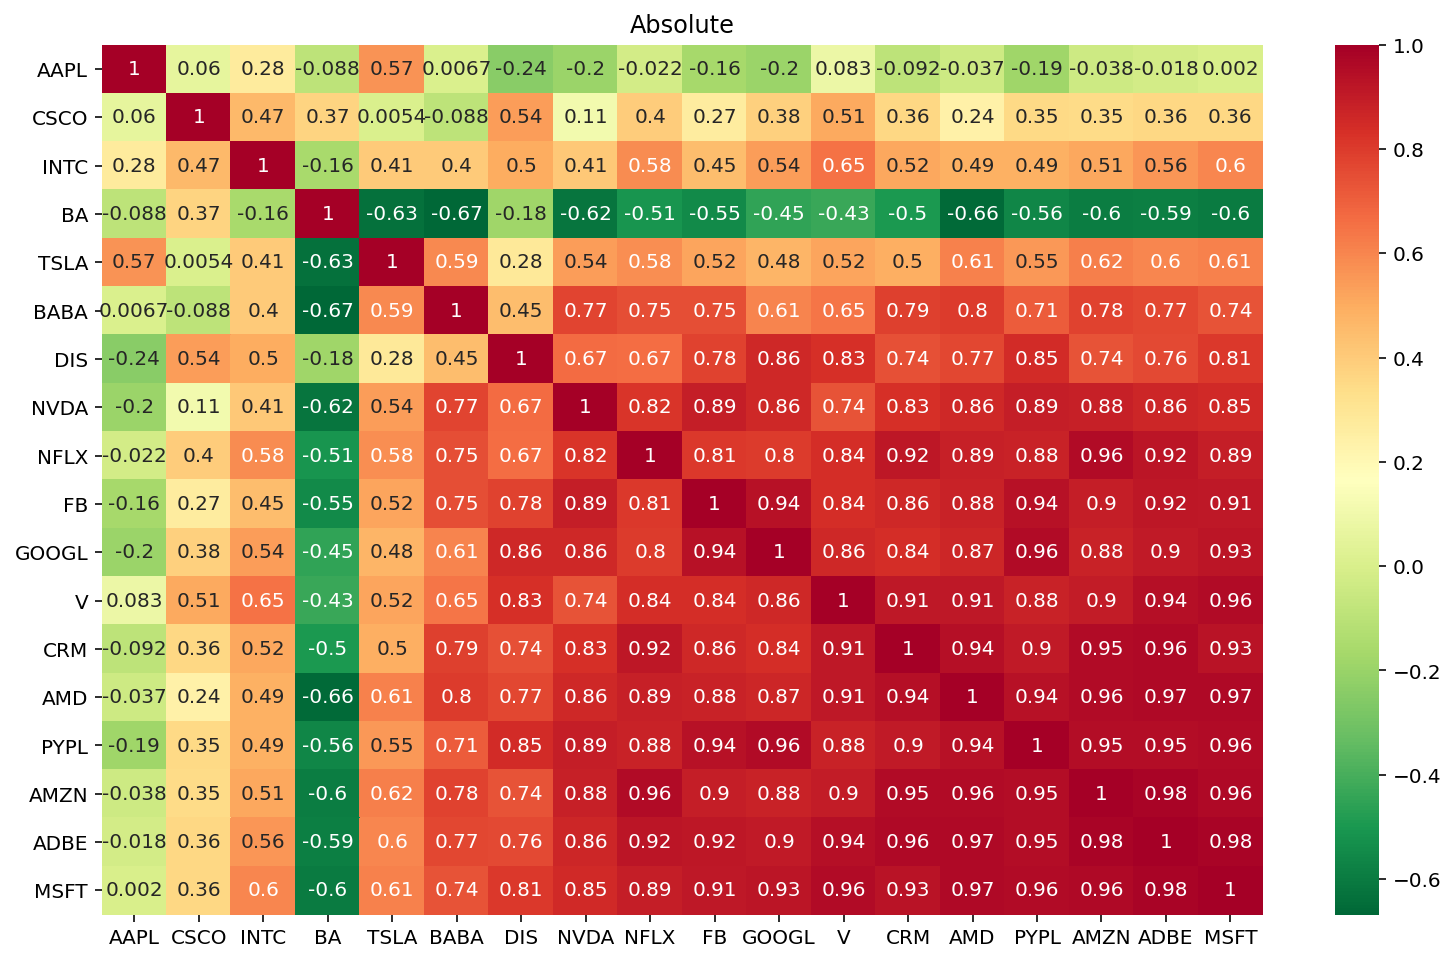

In [11]:
# Call the df with the list from summed correlation, sorted ascending.
plt.figure(figsize=(13,8))
plt.title('Normal')
sns.heatmap(correlation(my_list), annot=True, cmap="RdYlGn_r");

plt.figure(figsize=(13,8))
plt.title('Absolute')
sns.heatmap(abs_correlation(my_list), annot=True, cmap="RdYlGn_r");

In [13]:

# Bonus code: for each symbol, get the top three least correlated symbols from S&P100

def get_top_three(equity_list):
    
    # Add equity list to Universe
    all_sym = Universe.extend([x for x in equity_list if x not in Universe])
    
    # Get all correlations
    correlation_df = correlation(equity_list)
    
    least_corr_sym = []
    least_corr_coef = []
    
    for symbol in equity_list:

        top_three = abs(correlation_df[symbol]).sort_values(ascending=True).head(3)

        for item in zip(top_three.index, top_three):

            index_tuple = (symbol, item[0])
            least_corr_sym.append(index_tuple)
            least_corr_coef.append(item[1])

    top_three_df = pd.DataFrame(
        least_corr_coef,
        index = pd.MultiIndex.from_tuples(least_corr_sym, names=('Symbol', 'Least correlation')),
        columns=['CC']
    )
    
    return top_three_df

In [15]:

# S&P 100
Universe = ['AAL', 'AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'ALGN', 'ALXN', 'AMAT', 'AMGN', 'AMZN', 
            'ASML', 'ATVI', 'AVGO', 'BIDU', 'BIIB', 'BKNG', 'BMRN', 'CA', 'CDNS', 'CELG', 'CERN', 
            'CHKP', 'CHTR', 'CMCSA', 'COST', 'CSCO', 'CSX', 'CTAS', 'CTRP', 'CTSH', 'CTXS', 'DISH', 
            'DLTR', 'EA', 'EBAY', 'ESRX', 'EXPE', 'FAST', 'FB', 'FISV', 'FOX', 'FOXA', 'GILD', 
            'GOOG', 'GOOGL', 'HAS', 'HOLX', 'HSIC', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 
            'JBHT', 'JD', 'KHC', 'KLAC', 'LBTYA', 'LBTYK', 'LRCX', 'MAR', 'MCHP', 'MDLZ', 'MELI', 
            'MNST', 'MSFT', 'MU', 'MXIM', 'MYL', 'NFLX', 'NTES', 'NVDA', 'ORLY', 'PAYX', 'PCAR', 
            'PYPL', 'QCOM', 'QRTEA', 'REGN', 'ROST', 'SBUX', 'SHPG', 'SIRI', 'SNPS', 'STX', 'SWKS',
            'SYMC', 'TMUS', 'TSLA', 'TTWO', 'TXN', 'ULTA', 'VOD', 'VRSK', 'VRTX', 'WBA', 'WDAY', 
            'WDC', 'WYNN', 'XLNX', 'XRAY']

In [16]:
top_three = get_top_three(my_list)
top_three

CC
Symbol Least correlation          
INTC   BA                 0.155509
       AAPL               0.275100
       BABA               0.404115
MSFT   AAPL               0.002031
       CSCO               0.360664
       INTC               0.600550
NFLX   AAPL               0.022432
       CSCO               0.396700
       BA                 0.510311
NVDA   CSCO               0.113684
       AAPL               0.198885
       INTC               0.409785
PYPL   AAPL               0.185843
       CSCO               0.349844
       INTC               0.489852
TSLA   CSCO               0.005368
       DIS                0.283219
       INTC               0.405630
V      AAPL               0.083248
       BA                 0.430950
       CSCO               0.510539
AAPL   MSFT               0.002031
       BABA               0.006645
       ADBE               0.017219
ADBE   AAPL               0.017219
       CSCO               0.356973
       INTC               0.559129
AMD    AAPL               0.037492
       CSCO               0.237872
       INTC               0.489963
AMZN   AAPL               0.038162
       CSCO               0.346292
       INTC               0.514789
BA     AAPL               0.088372
       INTC               0.155509
       DIS                0.183981
BABA   AAPL               0.006645
       CSCO               0.088470
       INTC               0.404115
CRM    AAPL               0.092236
       CSCO               0.356968
       BA                 0.495928
CSCO   TSLA               0.005368
       AAPL               0.059654
       BABA               0.088470
DIS    BA                 0.183981
       AAPL               0.242153
       TSLA               0.283219
FB     AAPL               0.160048
       CSCO               0.265739
       INTC               0.447176
GOOGL  AAPL               0.198536
       CSCO               0.384287
       BA                 0.450599